## Project II - Regression Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'low fat', 'Regular', 'reg'],['LF','LF','REG','REG'])

In [4]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [5]:
avg = df['Item_Weight'].mean()
df['Item_Weight'].fillna(value=avg, inplace=True)

In [6]:
df['Outlet_Size'].fillna(value='Medium', inplace=True)

In [7]:
df = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [8]:
df_real = pd.get_dummies(df, drop_first=True)
df_real

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_REG,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [9]:
X = df_real.drop(['Item_Outlet_Sales'], axis=1)
y = np.array(df_real['Item_Outlet_Sales']).reshape(-1,1)

## 54

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
dt_regressor = DecisionTreeRegressor()

In [14]:
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [15]:
predicted = dt_regressor.predict(X_test)
predicted

array([4013.4424, 5369.0112, 4876.985 , ..., 3271.7412, 3588.662 ,
        567.2616])

## 55

In [16]:
from sklearn import metrics

In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted))
print('MSE:', metrics.mean_squared_error(y_test, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R2:', metrics.r2_score(y_test, predicted))

MAE: 1116.77308914956
MSE: 2563180.8366671125
RMSE: 1600.9937028817799
R2: 0.13121973286520483


## 56

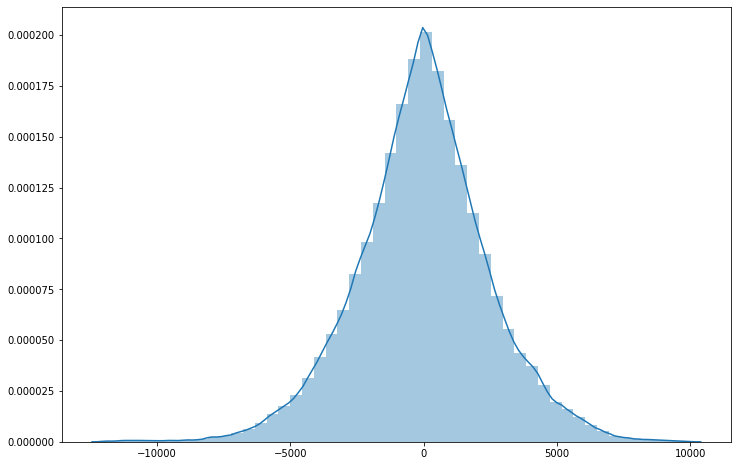

In [18]:
fig=plt.figure(figsize=(12,8))
sns.distplot((y_test-predicted), bins=50)

## 57

In [19]:
dict_compare = {'Sales': y_test.flatten(), 'Predicted': predicted.flatten()}
df_predicted = pd.DataFrame(dict_compare)
df_predicted

,Sales,Predicted
0,4426.2384,4013.4424
1,4845.0266,5369.0112
2,2293.0152,4876.9850
3,1065.2800,2334.9606
4,2345.6134,1438.1280
...,...,...
1700,3207.8244,2693.8268
1701,2263.7200,1775.6886
1702,1906.8512,3271.7412
1703,2773.0570,3588.6620


In [20]:
print(df_predicted.to_string())

           Sales   Predicted
0      4426.2384   4013.4424
1      4845.0266   5369.0112
2      2293.0152   4876.9850
3      1065.2800   2334.9606
4      2345.6134   1438.1280
5       322.2472    334.2316
6      1860.2452   2432.8332
7       209.7270    790.9704
8      4377.6350   4202.5296
9       322.9130   1725.7536
10      314.2576    792.3020
11       56.5930    229.0352
12     2407.5328   1551.3140
13     1647.8550   1921.4988
14     3560.6984   1752.3856
15      569.2590   2013.3792
16     4339.0186   2330.3000
17     2402.2064   2024.0320
18     4500.8080   2460.7968
19     4647.2840   4414.9198
20     2233.0932    601.2174
21     1603.9122   2157.1920
22     2763.0700   1757.7120
23     6239.8776   2836.3080
24      588.5672    865.5400
25     1565.9616   4456.1994
26     4175.8976   6002.8528
27     1631.2100   3866.9664
28     1539.9954   3115.9440
29      745.6960    525.9820
30     3775.0860   2283.0282
31     1491.3920   1837.6080
32     3139.9128   4448.2098
33     4804.41

## 58

In [21]:
df_predicted.corr()

,Sales,Predicted
Sales,1.000000,0.585117
Predicted,0.585117,1.000000


In [22]:
# Decision Tree ไม่จำเป็นต้องทำ StandardScaler